In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10

In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_test.shape}')

Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_train: (10000, 1)


### 0- Airplanes
### 1- Cars
### 2- Birds
### 3- Cats
### 4- Deer
### 5- Dogs
### 6- Frogs
### 7- Horses
### 8- Ships
### 9- Trucks

Actull Label: [7]


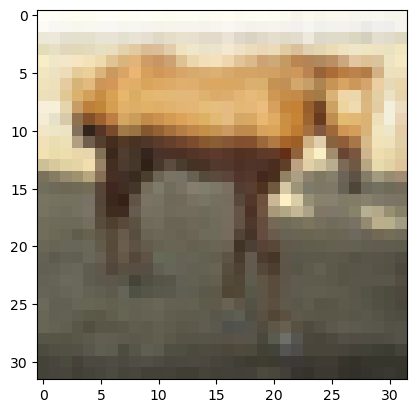

In [6]:
i = 2000
plt.imshow(X_train[i])
print(f'Actull Label: {y_train[i]}')

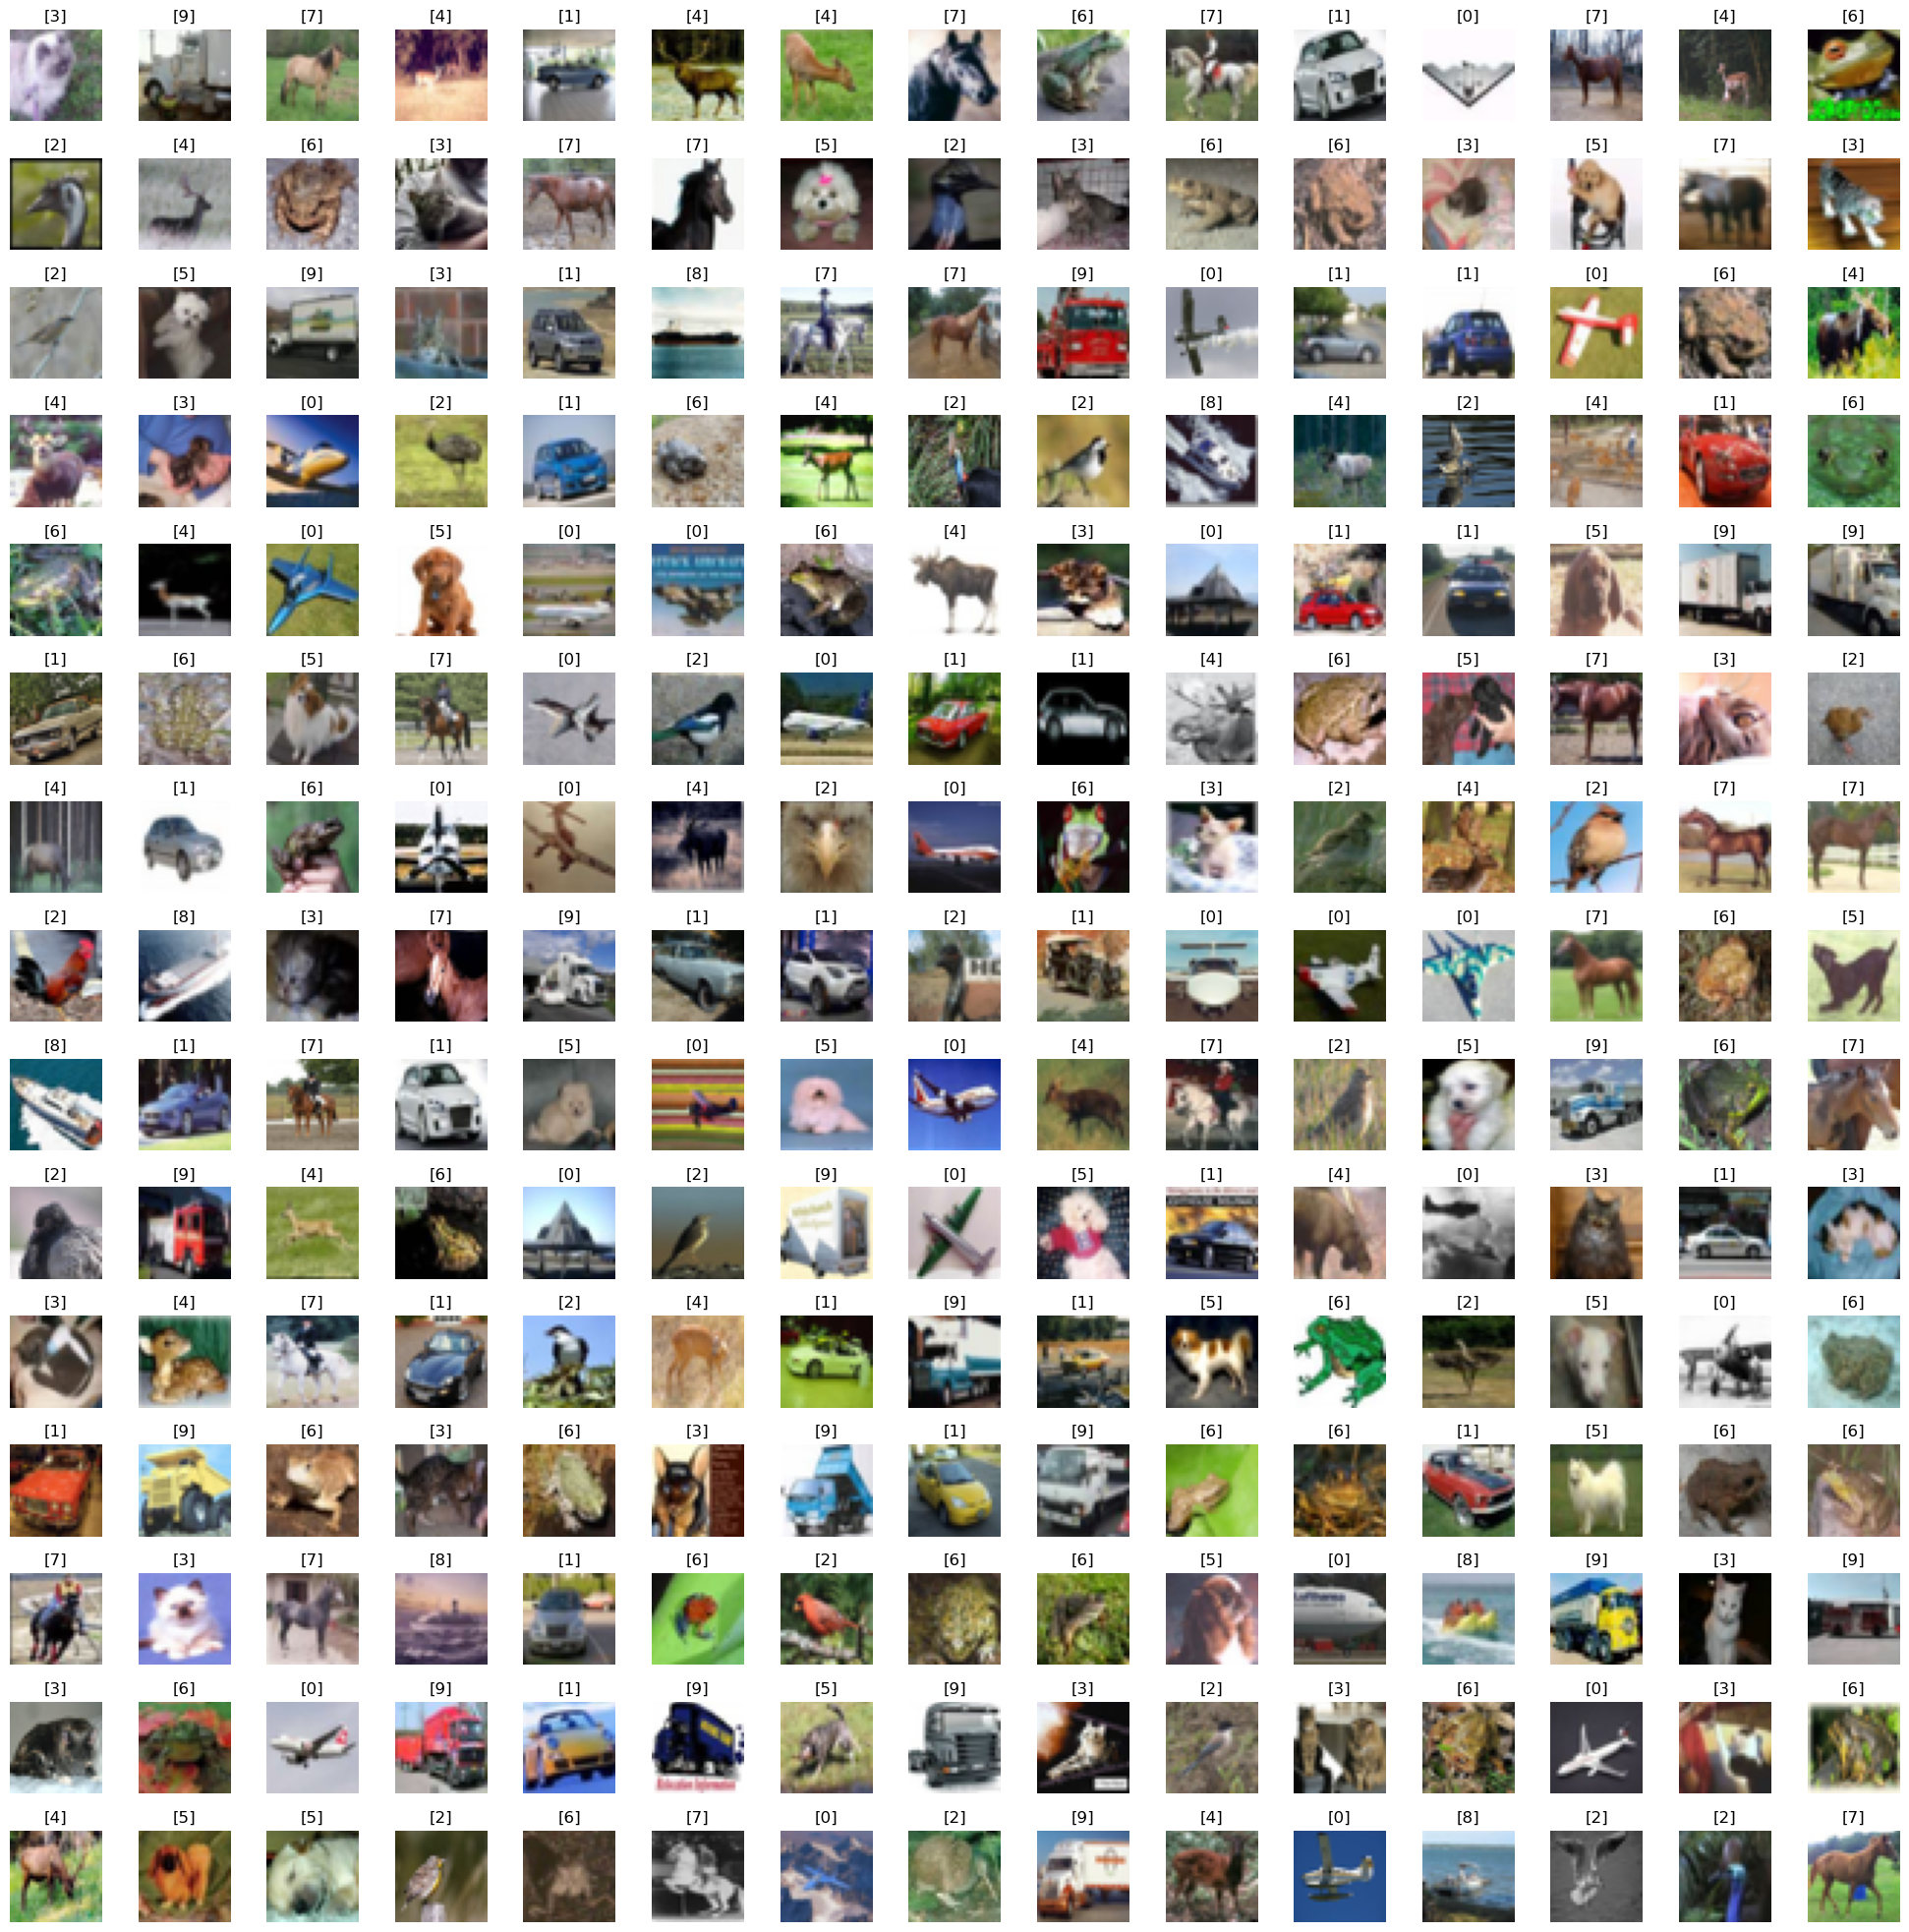

In [7]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize= (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

In [8]:
X_trian = X_train.astype('float32')
X_test = X_test.astype('float32')

In [9]:
number_cat = 10

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
y_train = keras.utils.to_categorical(y_train, number_cat)   # convert to binary

In [12]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
y_test = keras.utils.to_categorical(y_test, number_cat)   # convert to binary

In [14]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [15]:
# normalization
X_train = X_train / 255
X_test = X_test / 255

In [16]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [17]:
X_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [18]:
X_train.shape

(50000, 32, 32, 3)

In [19]:
Input_shape = X_train.shape[1:]

In [20]:
Input_shape

(32, 32, 3)

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [22]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters= 64, kernel_size= (3, 3), 
                     activation= 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters= 64, kernel_size= (3, 3), 
                     activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.3))
cnn_model.add(Conv2D(filters= 128, kernel_size= (3, 3), 
                     activation= 'relu'))
cnn_model.add(Conv2D(filters= 128, kernel_size= (3, 3), 
                     activation= 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.5))

cnn_model.add(Flatten())
cnn_model.add(Dense(units= 512, activation= 'relu'))
cnn_model.add(Dense(units= 256, activation= 'relu'))
cnn_model.add(Dense(units= 10, activation= 'softmax'))

In [23]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 128)       147584    
                                                        

In [24]:
cnn_model.compile(loss= 'categorical_crossentropy', 
                  optimizer= keras.optimizers.RMSprop(lr = 0.001), 
                  metrics= ['accuracy'])

C:\Users\scs\anaconda3\envs\tf-gpu\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [25]:
history = cnn_model.fit(X_train, y_train, epochs= 5, batch_size= 30, shuffle= True)

Epoch 1/5
1667/1667 [==============================] - 72s 37ms/step - loss: 1.5855 - accuracy: 0.4293
Epoch 2/5
1667/1667 [==============================] - 60s 36ms/step - loss: 1.1878 - accuracy: 0.5872
Epoch 3/5
1667/1667 [==============================] - 60s 36ms/step - loss: 1.0901 - accuracy: 0.6290
Epoch 4/5
1667/1667 [==============================] - 62s 37ms/step - loss: 1.0552 - accuracy: 0.6446
Epoch 5/5
1667/1667 [==============================] - 62s 37ms/step - loss: 1.0483 - accuracy: 0.6511


In [26]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuaracy: {}'.format(evaluation[1]))

313/313 [==============================] - 7s 16ms/step - loss: 0.9518 - accuracy: 0.6761
Test Accuaracy: 0.6761000156402588


In [27]:
evaluation

[0.9518206119537354, 0.6761000156402588]

In [29]:
predictions = cnn_model.predict(X_test)
predictions

313/313 [==============================] - 6s 12ms/step


array([[1.36580551e-02, 5.32452390e-03, 3.10512334e-02, ...,
        1.33629115e-02, 7.21561238e-02, 9.88006219e-03],
       [4.61731181e-02, 4.49340194e-01, 1.91659739e-04, ...,
        2.60675574e-06, 4.64575827e-01, 3.96243632e-02],
       [2.52692908e-01, 2.69420892e-01, 1.18283750e-02, ...,
        3.06961918e-03, 3.40026915e-01, 1.01810023e-01],
       ...,
       [8.69583338e-03, 2.93971784e-03, 1.30355805e-01, ...,
        1.10201195e-01, 1.07473147e-03, 2.56501883e-03],
       [4.34364468e-01, 2.25243539e-01, 2.77392361e-02, ...,
        5.93405217e-03, 4.08188328e-02, 8.00156891e-02],
       [1.24522576e-05, 3.38520181e-08, 7.07152823e-04, ...,
        9.62398946e-01, 8.40933865e-08, 6.93041727e-07]], dtype=float32)

In [30]:
predicted_class = np.argmax(predictions, axis=1)
predicted_class

array([3, 8, 8, ..., 5, 0, 7], dtype=int64)

In [31]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [32]:
y_test = y_test.argmax(1)

In [33]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

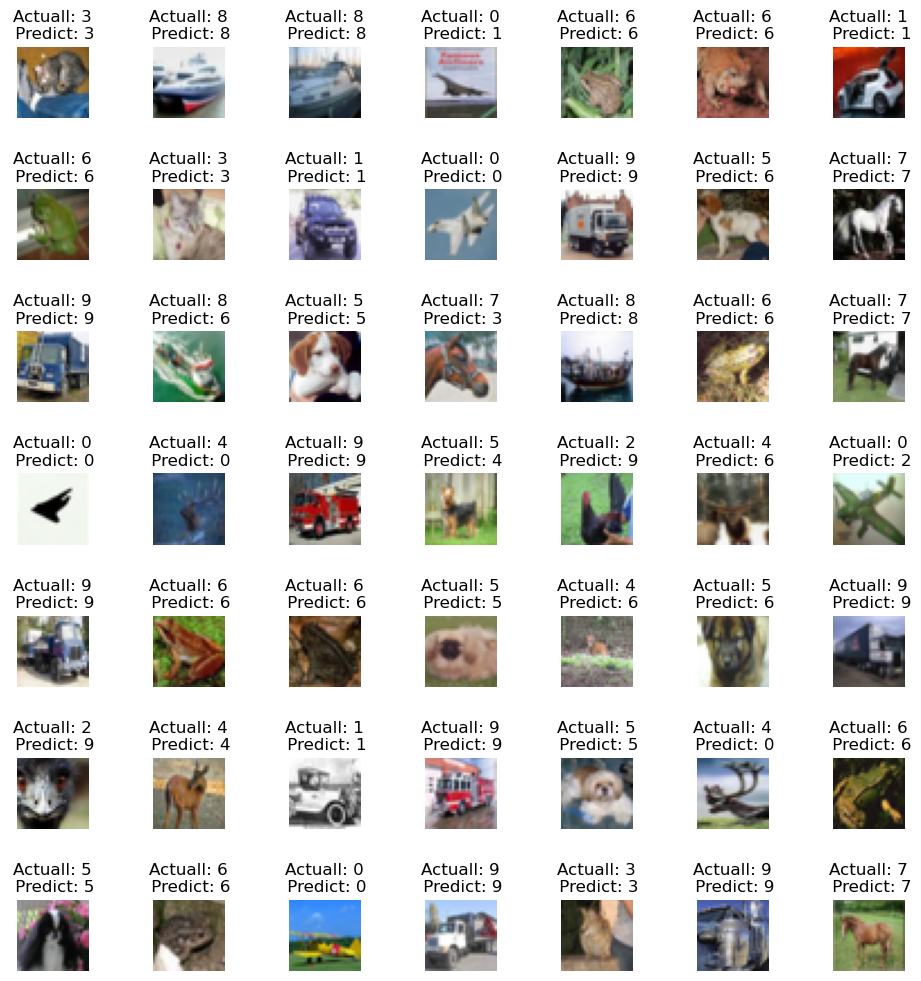

In [35]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize= (12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Actuall: {0}\n Predict: {1}'.format(y_test[i], predicted_class[i]))
    axes[i].axis('off')

plt.subplots_adjust(hspace = 1)

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
con_mat = confusion_matrix(y_test, predicted_class)
con_mat

array([[785,  22,  24,   6,   7,   1,  26,   6,  57,  66],
       [  9, 895,   0,   1,   2,   1,  17,   2,   7,  66],
       [109,  12, 467,  20,  68,  23, 218,  46,  14,  23],
       [ 39,  17,  53, 306,  65, 100, 317,  40,  17,  46],
       [ 48,   9,  34,  21, 503,   4, 260,  99,  10,  12],
       [ 19,  15,  76, 109,  38, 460, 156,  87,   9,  31],
       [  4,   2,  11,  20,   4,   2, 940,   3,   9,   5],
       [ 24,   5,  28,  26,  30,  13,  61, 758,   4,  51],
       [ 74,  60,   6,   4,   4,   1,  21,   1, 784,  45],
       [ 16,  91,   1,   5,   1,   1,   9,   2,  11, 863]], dtype=int64)

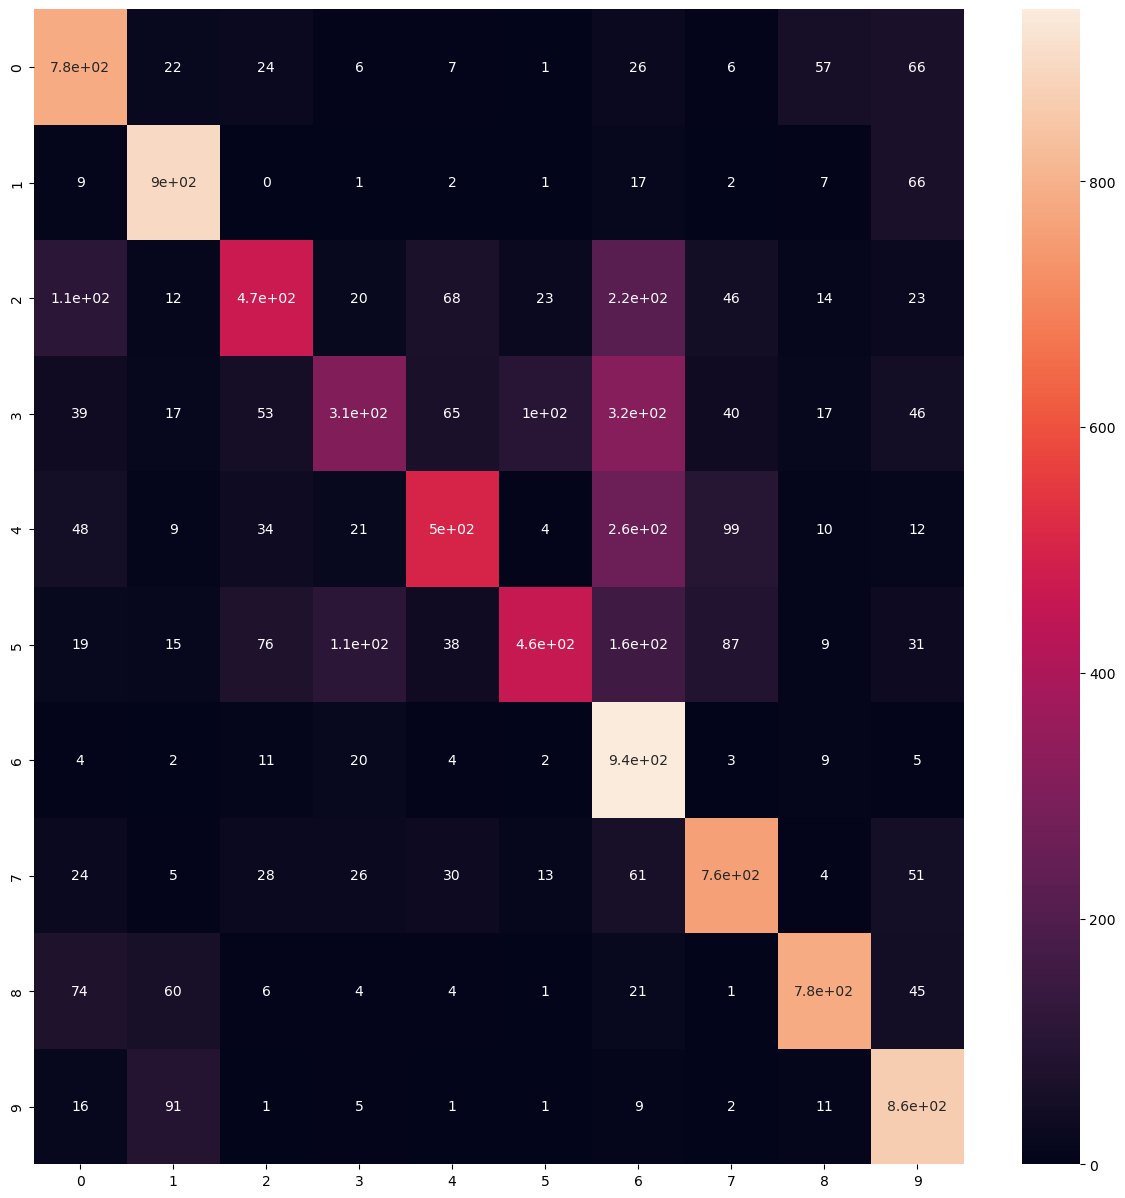

In [38]:
plt.figure(figsize = (15, 15))
sns.heatmap(con_mat, annot = True)
plt.show()

In [39]:
history.history

{'loss': [1.5854506492614746,
  1.187849521636963,
  1.09010648727417,
  1.055216908454895,
  1.0483454465866089],
 'accuracy': [0.4293000102043152,
  0.5871999859809875,
  0.6290000081062317,
  0.6445800065994263,
  0.6510999798774719]}

In [40]:
import os 
dir = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(dir):
    os.makedirs(dir)
model_path = os.path.join(dir, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

# Data Augmentation

In [41]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [42]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_test.shape}')

Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_train: (10000, 1)


In [46]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [43]:
from keras.preprocessing.image import ImageDataGenerator

In [49]:
generator_1 = ImageDataGenerator(rotation_range= 90)
generator_2 = ImageDataGenerator(vertical_flip= True)
generator_3 = ImageDataGenerator(height_shift_range= 0.5)
generator_4 = ImageDataGenerator(brightness_range= (1, 5))

In [57]:
n = 8
X_trian_sample = X_train[:n]

In [58]:
X_trian_sample.shape

(8, 32, 32, 3)

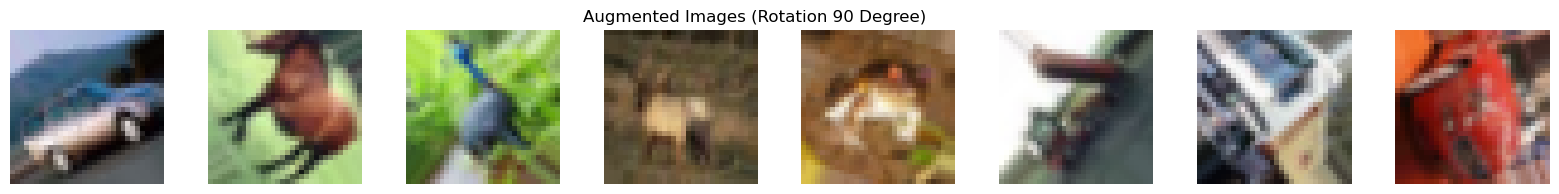

In [63]:
fig = plt.figure(figsize=(20, 2))

for x_batch in generator_1.flow(X_trian_sample, batch_size=n):
    for i in range(n):
        ax = fig.add_subplot(1, n, i+1)
        ax.imshow(np.uint8(x_batch[i]))
        ax.axis('off')

    fig.suptitle('Augmented Images (Rotation 90 Degree)')
    plt.show()
    break

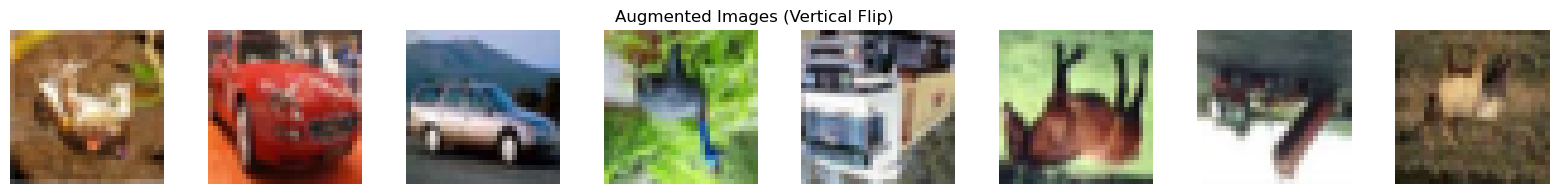

In [64]:
fig = plt.figure(figsize=(20, 2))

for x_batch in generator_2.flow(X_trian_sample, batch_size=n):
    for i in range(n):
        ax = fig.add_subplot(1, n, i+1)
        ax.imshow(np.uint8(x_batch[i]))
        ax.axis('off')

    fig.suptitle('Augmented Images (Vertical Flip)')
    plt.show()
    break

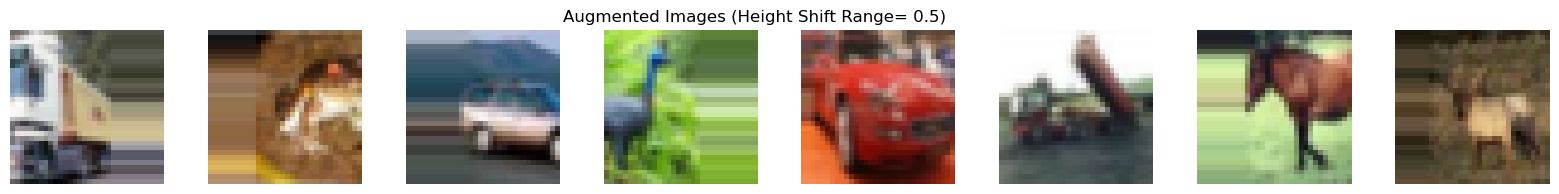

In [65]:
fig = plt.figure(figsize=(20, 2))

for x_batch in generator_3.flow(X_trian_sample, batch_size=n):
    for i in range(n):
        ax = fig.add_subplot(1, n, i+1)
        ax.imshow(np.uint8(x_batch[i]))
        ax.axis('off')

    fig.suptitle('Augmented Images (Height Shift Range= 0.5)')
    plt.show()
    break

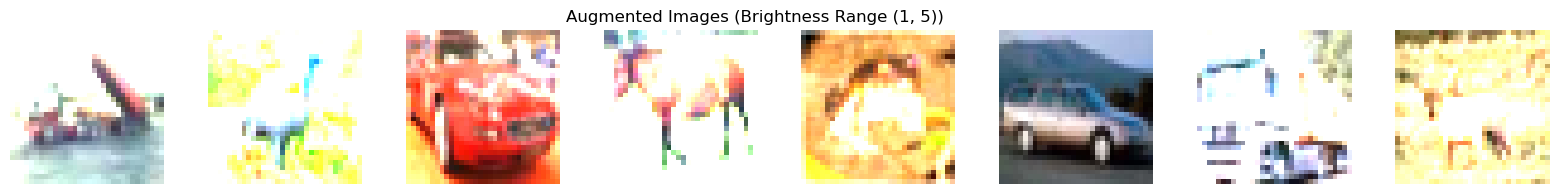

In [66]:
fig = plt.figure(figsize=(20, 2))

for x_batch in generator_4.flow(X_trian_sample, batch_size=n):
    for i in range(n):
        ax = fig.add_subplot(1, n, i+1)
        ax.imshow(np.uint8(x_batch[i]))
        ax.axis('off')

    fig.suptitle('Augmented Images (Brightness Range (1, 5))')
    plt.show()
    break

In [68]:
DataGen = ImageDataGenerator(
    rotation_range= 90,
    width_shift_range= 0.1,
    horizontal_flip= True,
    vertical_flip= True
)

In [69]:
DataGen.fit(X_train)

In [71]:
cnn_model.fit_generator(DataGen.flow(X_trian, y_train, batch_size= 32), epochs= 5)

C:\Windows\Temp\ipykernel_8108\535870335.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model.fit_generator(DataGen.flow(X_trian, y_train, batch_size= 32), epochs= 5)


Epoch 1/5
1563/1563 [==============================] - 128s 80ms/step - loss: 132.9301 - accuracy: 0.0030
Epoch 2/5
1563/1563 [==============================] - 74s 48ms/step - loss: 103.9674 - accuracy: 0.0000e+00
Epoch 3/5
1563/1563 [==============================] - 74s 47ms/step - loss: 104.0210 - accuracy: 0.0000e+00
Epoch 4/5
1563/1563 [==============================] - 72s 46ms/step - loss: 103.9665 - accuracy: 0.0000e+00
Epoch 5/5
1563/1563 [==============================] - 77s 49ms/step - loss: 103.9661 - accuracy: 2.0000e-05


In [ ]:
dir = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(dir):
    os.makedirs(dir)
model_path = os.path.join(dir, 'keras_cifar10_trained_model_augmented.h5')
cnn_model.save(model_path)